/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

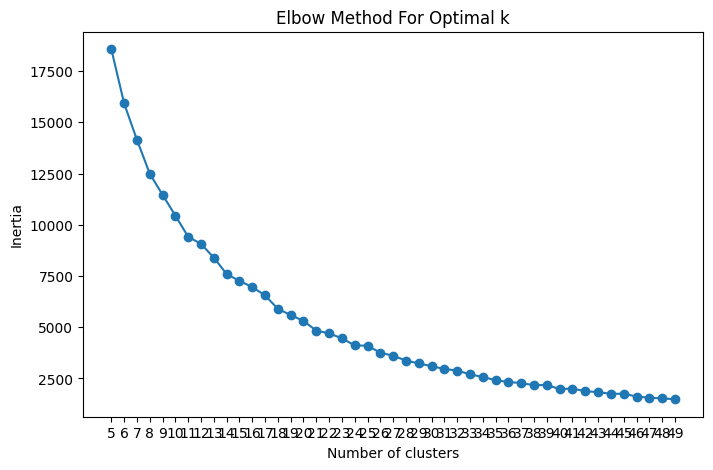

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

# KMeans elbow method, using the WCSS measure

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def main(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Drop the 'Country' column or the first column
    df = df.drop(df.columns[0], axis=1)

    # Fill missing values with the mean of the columns
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Determine the range of cluster counts to evaluate
    cluster_range = range(5, 50)

    # Apply the elbow method
    inertia_values = []
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_filled)
        inertia_values.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia_values, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.show()

if __name__ == "__main__":
    inputFile = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/child_mortality.csv"
    main(inputFile)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


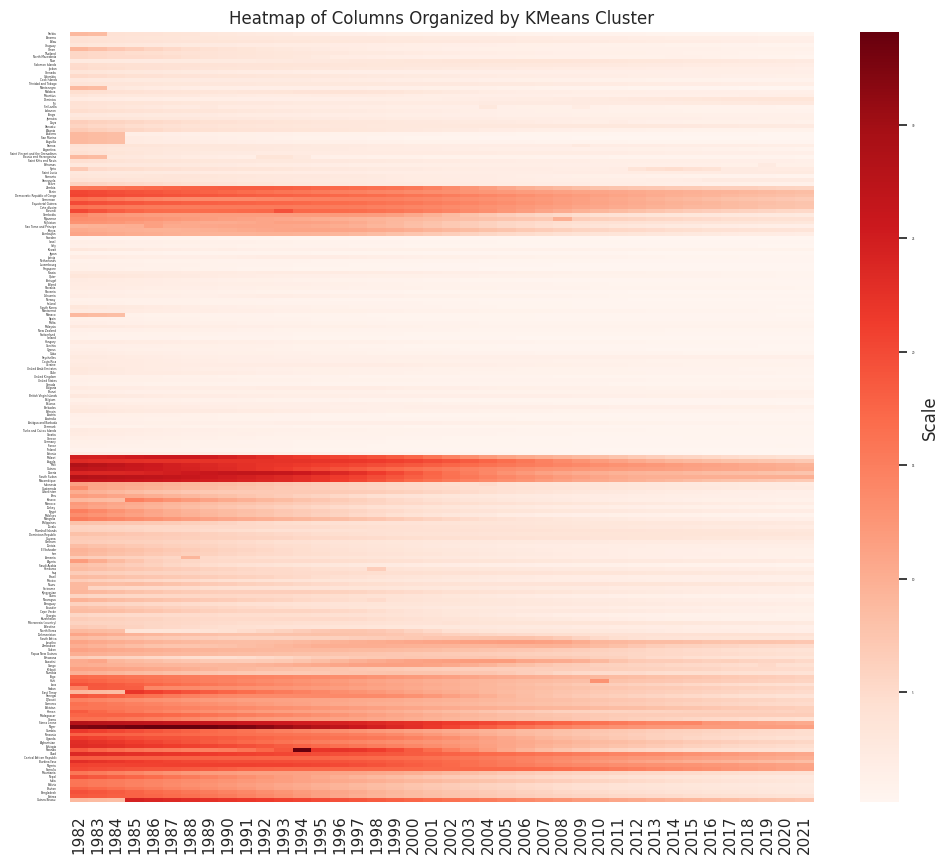

In [ ]:
# KMeans and heatmap

import pandas as pd
import numpy as np
import sys
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Read the CSV file
inputFile = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/child_mortality.csv"
df = pd.read_csv(inputFile)

# Separate the 'Country' column
countries = df.iloc[:, 0]
df_data = df.drop(df.columns[0], axis=1)

# Fill missing values with the mean of the columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_data), columns=df_data.columns)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=15, random_state=42)
df_imputed['cluster'] = kmeans.fit_predict(df_imputed)

# Add the country labels to the DataFrame for later use in plotting
df_imputed['Country'] = countries

# Sort the DataFrame by the cluster labels
df_imputed.sort_values('cluster', inplace=True)
sorted_countries = df_imputed['Country']

# Remove the 'Country' and 'cluster' columns to only visualize the data in the heatmap
df_imputed.drop(['Country', 'cluster'], axis=1, inplace=True)

# Set the font size for the row labels (countries)
sns.set(rc={'ytick.labelsize': 2})

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_imputed, cmap='Reds', annot=False, cbar_kws={'label': 'Scale'}, yticklabels=sorted_countries)
plt.title('Heatmap of Columns Organized by KMeans Cluster')
plt.yticks(rotation=0)  # Keep the country labels horizontal for readability
plt.show()

